## 找轮廓形状代码

[[[-1 -1  1 -1]
  [ 2 -1 -1  0]
  [ 4  1  3  0]
  [-1 -1 -1  2]
  [-1  2 -1  0]]]


C:\Users\Administrator\AppData\Local\Temp\ipykernel_19460\1555572072.py:35: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,5,i+1)


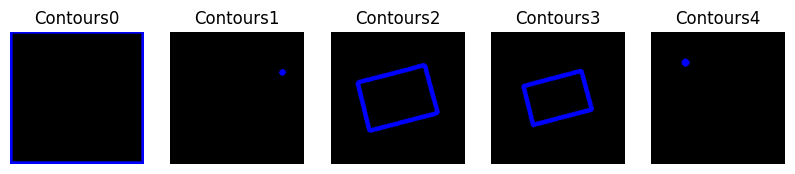

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

o = cv2.imread('d:/Kaoru/files/Study/python/git/photo/1.jpg')  

plt.figure(figsize=(10,10),dpi=100)
plt.subplot(1,4,1)
plt.title("o")
plt.imshow(o)
plt.axis('off')

# 转换为8位灰度图
gray = cv2.cvtColor(o,cv2.COLOR_BGR2GRAY)  

# 二值化图像
ret, binary = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)  

# 提取轮廓
contours, hierarchy = cv2.findContours(binary,
                                cv2.RETR_TREE, # 建立等级树
                      cv2.CHAIN_APPROX_SIMPLE) # 保留关键点
n=len(contours) # 获取轮廓个数
contoursImg=[] # 创建一个填充轮廓的元组

for i in range(n):
    temp=np.zeros(o.shape,np.uint8) # 创建一个所有元素为0的矩阵
    contoursImg.append(temp) # 添加画布
    contoursImg[i]=cv2.drawContours(contoursImg[i], # 传入画布
                                          contours, # 提取当前的轮廓集合
                                                 i, # 第i个轮廓
                                         (0,0,255), # RGB通道选择B
                                                 5) # 线条宽度5
    # 显示
    plt.subplot(1,5,i+1)
    plt.title("Contours"+str(i))
    plt.imshow(contoursImg[i]),plt.axis('off')

print(hierarchy) # 打印组织层次
